In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [161]:
img = cv2.imread('./test_imgs/image.png')

In [162]:
img.shape

(1200, 1600, 3)

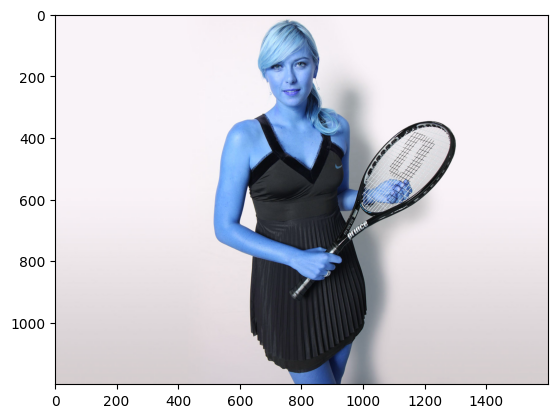

In [163]:
plt.imshow(img)

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

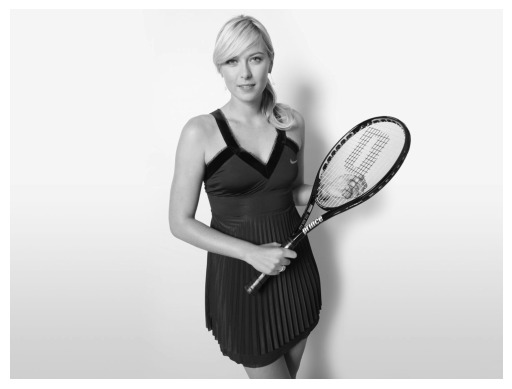

In [164]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')

In [165]:
face_cascade = cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('./opencv_haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3, 5)
faces

array([[658,  87, 202, 202]], dtype=int32)

In [166]:
x =  faces[0][0]
y =  faces[0][1]
w =  faces[0][2]
h =  faces[0][3]
type(faces[0][0])

numpy.int32

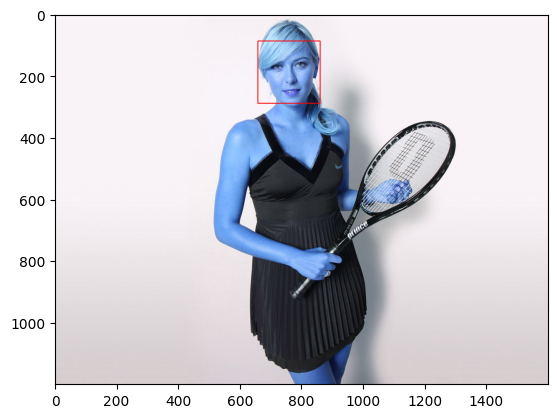

In [167]:
face_img = cv2.rectangle(img, (x, y), (x+w,y+h), (255,0, 0), 2)
plt.imshow(img)

In [168]:
eyes = eyes_cascade.detectMultiScale(gray, 1.3, 5)
eyes

array([[770, 139,  48,  48],
       [696, 147,  49,  49]], dtype=int32)

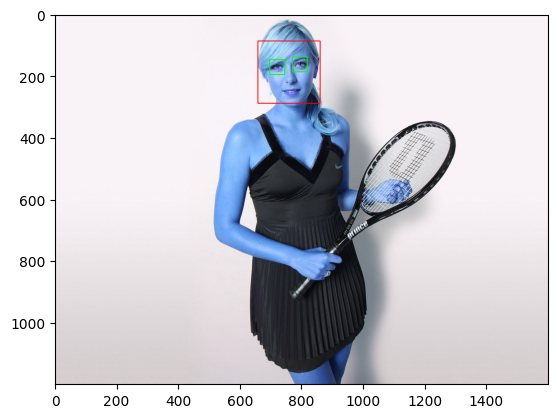

In [169]:
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(face_img, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
plt.imshow(face_img)

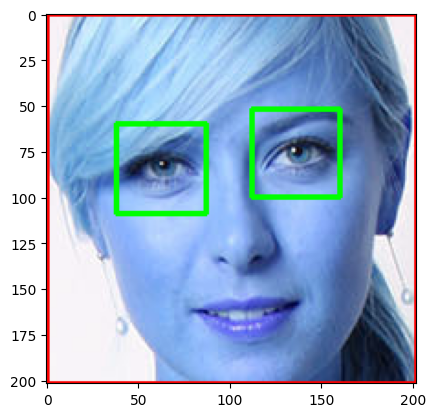

In [170]:
cropped_face = img[y:y+h, x:x+w]
plt.imshow(cropped_face, cmap='gray')

In [171]:
img2 = cv2.imread('./test_imgs/vk.png')


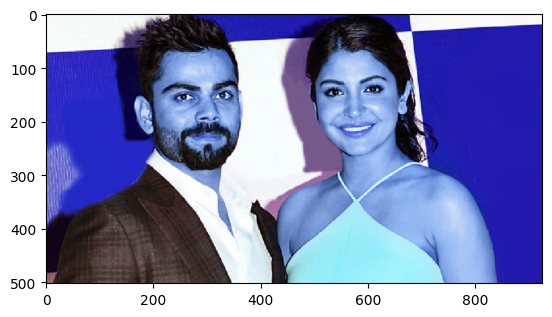

In [172]:
plt.imshow(img2)

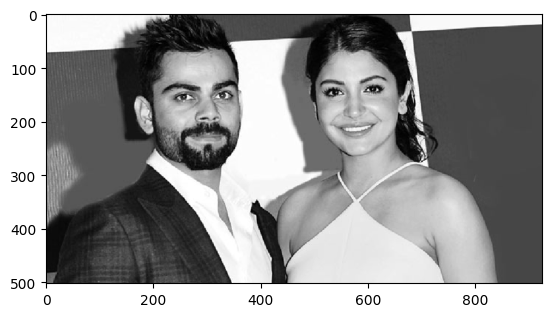

In [173]:

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray')

In [174]:
faces2 = face_cascade.detectMultiScale(gray2, 1.3, 5)
faces2

array([[191,  66, 210, 210],
       [484,  73, 188, 188]], dtype=int32)

In [175]:
for face in faces2:
    (x, y, w, h) = face
    face_img = cv2.rectangle(img2, (x, y), (x+w,y+h), (255,0, 0), 2)
    
    cropped_face = img2[y:y+h, x:x+w]
    eyes2 = eyes_cascade.detectMultiScale(cropped_face, 1.3, 5)
    print(eyes2)
    for (ex,ey,ew,eh) in eyes2:
        cv2.rectangle(img2, (x+ex,y+ey), (x+ex+ew,y+ey+eh), (0,255,0), 2)



[[ 43  68  42  42]
 [116  64  44  44]]
[[28 48 50 50]
 [97 43 51 51]]


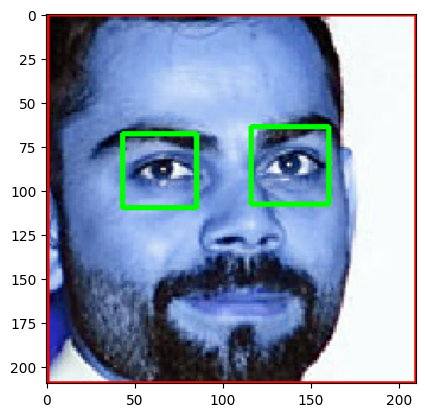

In [176]:
(x, y, w, h) = faces2[0]
plt.imshow(img2[y:y+h, x:x+w], cmap='gray')

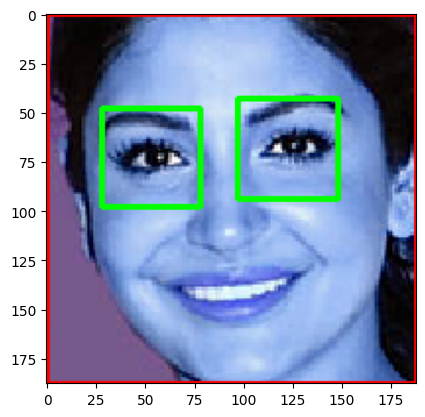

In [177]:
(x, y, w, h) = faces2[1]
plt.imshow(img2[y:y+h, x:x+w], cmap='gray')

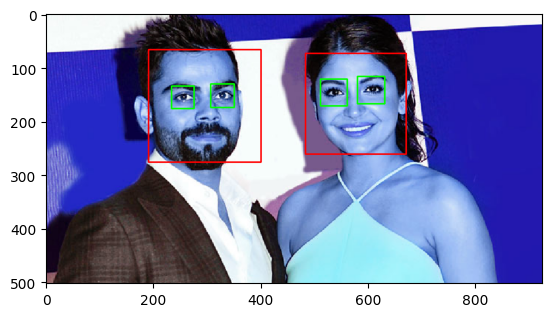

In [178]:
plt.imshow(img2)

In [179]:
def get_cropped_face_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return None
    for face in faces:
        (x, y, w, h) = face
        cropped_face = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(cropped_face, 1.3, 5)
        if len(eyes) >= 2:
            return cropped_face
    return None

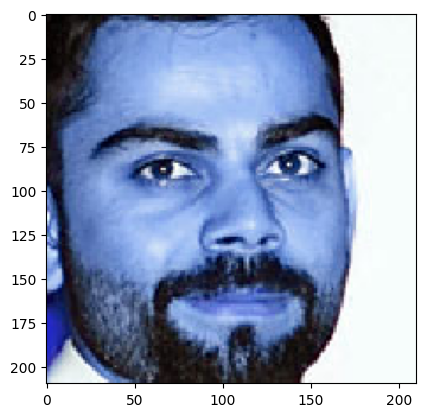

In [180]:
plt.imshow(get_cropped_face_if_2_eyes('./test_imgs/vk.png'), cmap='gray')

In [181]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [182]:
import os
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/cropped',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [183]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)


In [184]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    cnt=1
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_face_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            
            cropped_file_name = celebrity_name + str(cnt) + '.jpg'
            cnt += 1
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            if celebrity_name not in celebrity_file_names_dict:
                celebrity_file_names_dict[celebrity_name] = []
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            print(cropped_file_path)
            print(celebrity_file_names_dict)
            print('------------------')
        

maria_sharapova
./dataset/cropped/maria_sharapova/maria_sharapova1.jpg
{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.jpg']}
------------------
./dataset/cropped/maria_sharapova/maria_sharapova2.jpg
{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.jpg', './dataset/cropped/maria_sharapova/maria_sharapova2.jpg']}
------------------
./dataset/cropped/maria_sharapova/maria_sharapova3.jpg
{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.jpg', './dataset/cropped/maria_sharapova/maria_sharapova2.jpg', './dataset/cropped/maria_sharapova/maria_sharapova3.jpg']}
------------------
./dataset/cropped/maria_sharapova/maria_sharapova4.jpg
{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.jpg', './dataset/cropped/maria_sharapova/maria_sharapova2.jpg', './dataset/cropped/maria_sharapova/maria_sharapova3.jpg', './dataset/cropped/maria_sharapova/maria_sharapova4.jpg']}
------------------
./dataset/cropped/ma

In [185]:
!pip install PyWavelets


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [225]:
import numpy as np
import pywt 
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img

    # Datatype conversion
    #convert to gray scale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    #convert to float
    imArray = np.float32(imArray) / 255
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    #reconstruct
    imArray_H = pywt.waverec2(coeffs_H, mode)
    #convert to uint8
    imArray_H = np.uint8(imArray_H * 255)
    return imArray_H

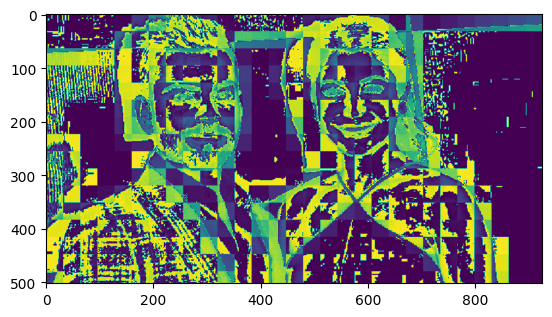

In [226]:
img = cv2.imread('./test_imgs/vk.png')
im_hr = w2d(img, 'db1', 5)
plt.imshow(im_hr)

In [227]:
celebrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova2.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova3.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova4.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova5.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova6.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova7.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova8.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova9.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova10.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova11.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova12.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova13.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova14.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova15.jpg',
  './dataset/cropped/maria_sharapova/maria_sharapova16.jpg',
  './dataset/c

In [228]:
class_dict = {}
cnt=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = cnt
    cnt += 1

class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [229]:
x = []
y = []

for celebrity_name, file_name in celebrity_file_names_dict.items():
    for training_img in file_name:
        img = cv2.imread(training_img)

        if img is None:
            continue

        scalled_img = cv2.resize(img, (32, 32))
        im_har = w2d(scalled_img, 'db1', 5)
        scalled_img_har = cv2.resize(im_har, (32, 32))
        combined_img = np.vstack((scalled_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])


[ WARN:0@10483.457] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/maria_sharapova/maria_sharapova26.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10483.458] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/virat_kohli/virat_kohli2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10483.476] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/virat_kohli/virat_kohli22.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10483.490] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/lionel_messi/lionel_messi8.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10483.490] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/lionel_messi/lionel_messi10.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10483.499] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/serena_williams/serena_williams1.jpg'): can't open/read file: check file path/integrity

In [230]:
x = np.array(x).reshape(len(x), 4096).astype('float32')
x.shape

(106, 4096)

In [231]:
len(x), len(y)

(106, 106)

In [232]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [233]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [235]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7272727272727273

In [236]:
print( pip.score(x_test, y_test))

0.7272727272727273


In [237]:
print(classification_report(y_test, pipe.predict(x_test), target_names=class_dict.keys()))

                 precision    recall  f1-score   support

maria_sharapova       1.00      1.00      1.00         6
    virat_kohli       0.67      1.00      0.80         6
   lionel_messi       0.50      0.33      0.40         3
serena_williams       0.60      0.75      0.67         4
  roger_federer       0.00      0.00      0.00         3

       accuracy                           0.73        22
      macro avg       0.55      0.62      0.57        22
   weighted avg       0.63      0.73      0.67        22



/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [238]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [239]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['linear', 'rbf']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    }
}

In [243]:
scores = []
best_estimators = {}

for model_name, mp in model_params.items():
    pipeline = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipeline, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
scores

/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in mat

[{'model': 'svm',
  'best_score': np.float64(0.8088235294117647),
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'logistic_regression',
  'best_score': np.float64(0.8088235294117647),
  'best_params': {'logisticregression__C': 1}},
 {'model': 'random_forest',
  'best_score': np.float64(0.7036764705882353),
  'best_params': {'randomforestclassifier__n_estimators': 10}}]

In [241]:
!pip install pandas


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [244]:
import pandas as pd
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.808824,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.808824,{'logisticregression__C': 1}
2,random_forest,0.703676,{'randomforestclassifier__n_estimators': 10}


In [ ]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=5))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))])}

In [245]:
print(best_estimators['svm'].score(x_test, y_test))

0.7727272727272727


In [246]:
print(best_estimators['logistic_regression'].score(x_test, y_test))

0.8636363636363636


/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [247]:
print(best_estimators['random_forest'].score(x_test, y_test))

0.6363636363636364


In [217]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=5))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))])}

In [211]:
!pip install seaborn


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [248]:
best_model = best_estimators['logistic_regression']

/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


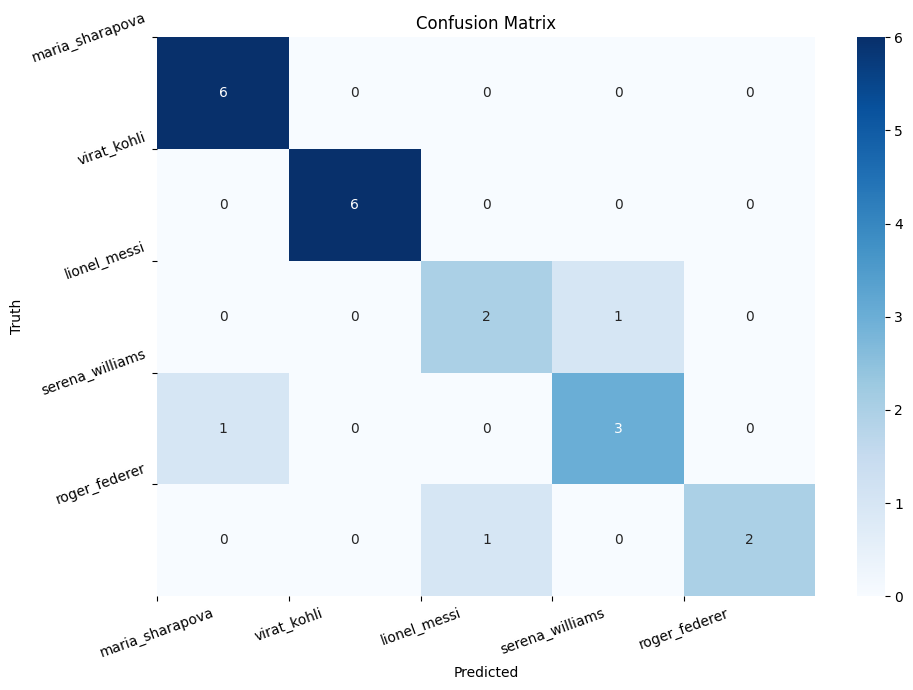

In [249]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, best_model.predict(x_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_dict)), labels=class_dict.keys(), rotation=20)
plt.yticks(ticks=np.arange(len(class_dict)), labels=class_dict.keys(), rotation=20)
plt.yticks(ticks=np.arange(len(class_dict)), labels=class_dict.keys())
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

## In my case Logistic Regression is performing well, so decided to choose it

In [250]:
best_model.fit(x,y)

/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/mdtashhirulislam/Documents/projects/Image Detection System/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in mat

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])

### download the model

In [251]:
!pip install joblib
import joblib
joblib.dump(best_model, 'face_recognition_model.pkl')


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


['face_recognition_model.pkl']

In [252]:
# save the class dictionary
import json
with open('class_dict.json', 'w') as f:
    json.dump(class_dict, f)